# Importing Libraries

In [3]:
import pandas as pd
from pandas import read_excel
import numpy as np
import re
from re import sub
import multiprocessing
from unidecode import unidecode
import os
from time import time 
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Activation,Embedding,Flatten,Bidirectional,MaxPooling2D, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD,Adam
from keras import regularizers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
import h5py
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# Predefined Functions 


In [4]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          
                           u"\u2000-\u206F"          
                               
                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    
    
    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰⚽️✌�￰৷￰'''
    
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

# Data Loading


In [6]:
df=pd.read_excel('/kaggle/input/pseudolabel/predicted_unsupervised_sentiment.xlsx')
df.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,sentence,sentiment
0,0,NaN,NaN,ওয়ও আমি গর্বিত বাঙ্গালি,1
1,1,NaN,NaN,বাংলাদেশ এর কিছু মানুষ নিজে কিছু করতে পারবেনা ...,0
2,2,NaN,NaN,রামোসের ঘুম আসে না,0
3,3,NaN,NaN,কোহলির প্রতি শ্রদ্ধা হারিয়ে ফেলছি,1
4,4,NaN,NaN,থ্যাঙ্ক ইউ মাছরাঙ্গা টেলিভিশনকিন্তু ছাপোষা আন্...,0


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


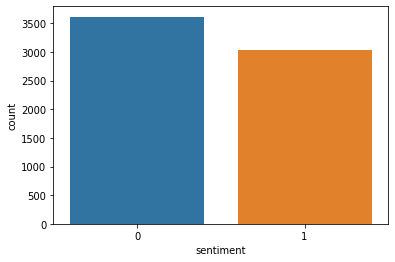

In [7]:
sns.countplot(df['sentiment']);

# Data Preprocessing


In [8]:
df['sentence'] = df.sentence.apply(lambda x: preprocessing(str(x)))

In [9]:
df.reset_index(drop=True, inplace=True)

In [17]:
from keras.utils import np_utils
keras.utils.np_utils.to_categorical

In [21]:
train1, test1 = train_test_split(df,random_state=69, test_size=0.2)
training_sentences = []
testing_sentences = []



train_sentences=train1['sentence'].values
train_labels=train1['sentiment'].values
for i in range(train_sentences.shape[0]): 

    x=str(train_sentences[i])
    training_sentences.append(x)
    
training_sentences=np.array(training_sentences)





test_sentences=test1['sentence'].values
test_labels=test1['sentiment'].values

for i in range(test_sentences.shape[0]): 
    x=str(test_sentences[i])
    testing_sentences.append(x)
    
testing_sentences=np.array(testing_sentences)


train_labels=keras.utils.np_utils.to_categorical(train_labels)


test_labels=keras.utils.np_utils.to_categorical(test_labels)
print("Training Set Length: "+str(len(train1)))
print("Testing Set Length: "+str(len(test1)))
print("training_sentences shape: "+str(training_sentences.shape))
print("testing_sentences shape: "+str(testing_sentences.shape))
print("train_labels shape: "+str(train_labels.shape))
print("test_labels shape: "+str(test_labels.shape))

Training Set Length: 5321
Testing Set Length: 1331
training_sentences shape: (5321,)
testing_sentences shape: (1331,)
train_labels shape: (5321, 2)
test_labels shape: (1331, 2)


In [22]:
print(training_sentences[1])
print(train_labels[0])

দেশের প্রধান যে সেই করছে অপরাধ তোমরা সিম নিয়ে অপরাধ বন্ধ করবে পাগল যত সব
[1. 0.]


In [23]:
vocab_size = 25000
embedding_dim = 300
max_length = 100
trunc_type='post'
oov_tok = "<OOV>"

In [24]:
print(training_sentences.shape)
print(train_labels.shape)

(5321,)
(5321, 2)


In [25]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
print(len(word_index))
print("Word index length:"+str(len(tokenizer.word_index)))
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)


test_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(test_sequences,maxlen=max_length)

18247
Word index length:18247


In [27]:
print("Sentence :--> \n")
print(training_sentences[3]+"\n")
print("Sentence Tokenized and Converted into Sequence :--> \n")
print(str(sequences[3])+"\n")
print("After Padding the Sequence with padding length 100 :--> \n")
print(padded[3])

Sentence :--> 

টাকা কি গাছে ধরে

Sentence Tokenized and Converted into Sequence :--> 

[14, 7, 1157, 158]

After Padding the Sequence with padding length 100 :--> 

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0   14    7
 1157  158]


In [28]:
print("Padded shape(training): "+str(padded.shape))
print("Padded shape(testing): "+str(testing_padded.shape))

Padded shape(training): (5321, 100)
Padded shape(testing): (1331, 100)


# Building Model

In [36]:
with tf.device('/gpu:0'):
    model= Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
    model.add(Conv1D(256, kernel_size=3, activation = "relu"))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Dropout(0.25))
    model.add(Conv1D(512, kernel_size=3, activation = "relu"))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dropout(0.25))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Flatten())

    model.add(Dense(256,kernel_regularizer=regularizers.l2(0.001),activation="relu"))
    model.add(Dense(2, activation='softmax'))
    
    adam=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False)
    model.summary()
    model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 300)          7500000   
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 98, 256)           230656    
_________________________________________________________________
bidirectional_7 (Bidirection (None, 98, 128)           164352    
_________________________________________________________________
dropout_5 (Dropout)          (None, 98, 128)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 96, 512)           197120    
_________________________________________________________________
bidirectional_8 (Bidirection (None, 128)               295424    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)              

In [37]:
history=model.fit(padded,train_labels,epochs=25,batch_size=512,validation_data=(testing_padded,test_labels),use_multiprocessing=True, workers=8)

Epoch 1/25
11/11 [==============================] - 7s 214ms/step - loss: 0.8315 - accuracy: 0.5589 - val_loss: 0.7748 - val_accuracy: 0.6236
Epoch 2/25
11/11 [==============================] - 1s 100ms/step - loss: 0.6378 - accuracy: 0.7358 - val_loss: 0.8714 - val_accuracy: 0.7355
Epoch 3/25
11/11 [==============================] - 1s 99ms/step - loss: 0.3425 - accuracy: 0.9100 - val_loss: 0.5240 - val_accuracy: 0.8189
Epoch 4/25
11/11 [==============================] - 1s 100ms/step - loss: 0.1739 - accuracy: 0.9711 - val_loss: 0.8007 - val_accuracy: 0.8272
Epoch 5/25
11/11 [==============================] - 1s 102ms/step - loss: 0.1021 - accuracy: 0.9895 - val_loss: 0.9162 - val_accuracy: 0.8182
Epoch 6/25
11/11 [==============================] - 1s 100ms/step - loss: 0.0704 - accuracy: 0.9959 - val_loss: 0.9672 - val_accuracy: 0.8272
Epoch 7/25
11/11 [==============================] - 1s 100ms/step - loss: 0.0560 - accuracy: 0.9979 - val_loss: 1.0784 - val_accuracy: 0.8317
Epoch 8

# Visualization

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


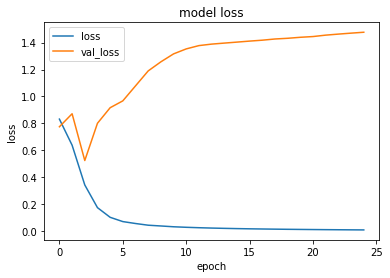

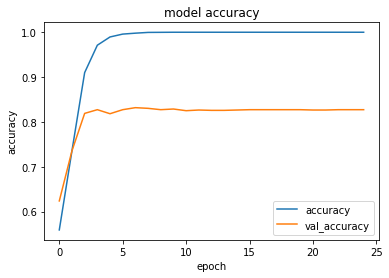

In [38]:
print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])
plt.show()

accuracy = history.history['accuracy']
val_accuracy= history.history['val_accuracy']
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

# Accuracy and Evaluation

In [39]:
#accuracy calculation
loss_and_metrics = model.evaluate(padded,train_labels,batch_size=256)
print("The train accuracy is: "+str(loss_and_metrics[1]))
loss_and_metrics = model.evaluate(testing_padded,test_labels,batch_size=256)
print("The test accuracy is: "+str(loss_and_metrics[1]))

21/21 [==============================] - 1s 24ms/step - loss: 0.0081 - accuracy: 1.0000
The train accuracy is: 1.0
6/6 [==============================] - 0s 22ms/step - loss: 1.4769 - accuracy: 0.8272
The test accuracy is: 0.8271976113319397
